# Моделирование речного стока с помощью искусственных нейронных сетей

План:
+ установка необходимых библиотек;
+ подготовка данных;
    * загрузка данных;
    * резервирование тестовой выборки;
    * масштабирование данных;
+ создание модели нейронной сети;
+ обучение нейронной сети;
+ моделирование; 
+ оценка эффективности;
+ тонкая настройка (домашнее задание).

## 1. Установка необходимых библиотек

Для работы нам понадобится последняя версия библиотеки [scikit-learn](http://scikit-learn.org/stable/install.html) -- 0.18.

Для установки в командной строке достаточно ввести:

```conda install scikit-learn```

In [1]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## 2. Подготовка данных

[Узнать подробности об объекте и используемых данных.](https://github.com/hydrogo/ML_in_hydrology_gs/blob/master/Vinograd_workshop_ML.ipynb)

In [2]:
# загрузка данных
data = pd.read_csv('./data/blackberry_1980-2011.txt', skiprows=12, header=0, sep=';', usecols=[0, 1, 2, 4, 5], 
                   names=['Date', 'Qobs', 'Ptot', 'Temp', 'PE'], index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11688 entries, 1980-01-01 to 2011-12-31
Data columns (total 4 columns):
Qobs    11688 non-null float64
Ptot    11688 non-null float64
Temp    11688 non-null float64
PE      11688 non-null float64
dtypes: float64(4)
memory usage: 456.6 KB


In [3]:
# формирование матриц признаков и векторов целевой переменной
X_train = data[['Ptot', 'Temp', 'PE']]['1980':'2000'].values
X_test  = data[['Ptot', 'Temp', 'PE']]['2001':'2011'].values

y_train = data['Qobs']['1980':'2000'].values
y_test  = data['Qobs']['2001':'2011'].values

In [4]:
# масштабирование признаков

# создаем объект скейлер
scaler = StandardScaler()

# нахождим параметры для скейлера
scaler.fit(X_train)

# масштабируем матрицы признаков обучающей и контрольной выборок
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3. Создание модели нейронной сети

In [19]:
# параметры нейронной сети
MLPRegressor?

In [12]:
# создаем модель нейронной сети с одним скрытым слоем и 500 нейронов на нем
mlp = MLPRegressor(hidden_layer_sizes=(500,), random_state=0)

## 4. Обучение нейронной сети

In [13]:
# обучаем нейронную сеть с параметрами по умолчанию
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## 5. Моделирование речного стока

In [14]:
# моделирование на обучающей выборке
pred_train = mlp.predict(X_train)

# моделирование на проверочной выборке
pred_test = mlp.predict(X_test)

## 6. Оценка эффективности расчетов

Используем стандартный критерий R2 (коэффициент детерминации)

In [15]:
# эффективность расчетов на обучающей выборке
mlp.score(X_train, y_train)

0.13830043018401295

In [16]:
# эффективность расчетов на проверочной выборке
mlp.score(X_test, y_test)

0.078920185711924273

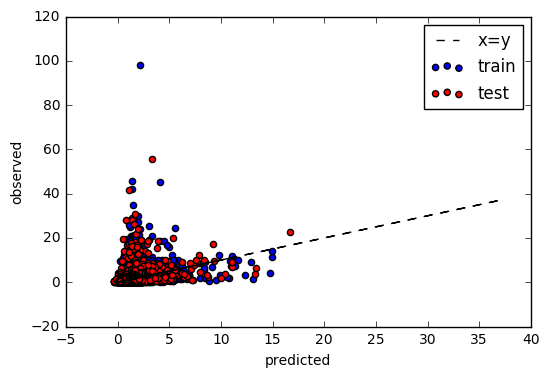

In [17]:
# визуализация результатов
plt.scatter(pred_train, y_train, c='blue', label= 'train')
plt.scatter(pred_test, y_test, c='red', label='test')

plt.plot(pred_train, pred_train, 'k--', label='x=y')

plt.xlabel('predicted')
plt.ylabel('observed')
plt.legend()

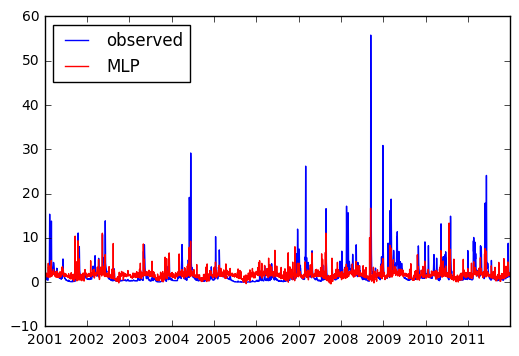

In [18]:
plt.plot(data['2001':'2011'].index, y_test, 'b-', label='observed')
plt.plot(data['2001':'2011'].index, pred_test, 'r-', label='MLP')
plt.legend(loc='best')

## Выводы

**Все плохо.**

## Что дальше?

**В чем может быть причина низкой эффективности нейронной сети?**

Свои варианты модели присылайте на адрес ayzel(sobaka)iwp.ru